## Imports

In [19]:
from scipy.optimize import OptimizeResult
from helpers import *

## Broyden method: quasi-Newton method using Broyden's formula

In [20]:
def broyden_method_implementation(f, grad_f, x0, tol=1e-6, max_iter=1000):
    x = np.array(x0, dtype=float)
    n = len(x)
    B = np.eye(n)
    nfev = 1
    njev = 0
    x_history = [x.copy()]
    g = grad_f(x)
    njev += 1

    for nit in range(max_iter):
        if np.linalg.norm(g) < tol:
            break
        try:
            p = -np.linalg.solve(B, g)
        except np.linalg.LinAlgError:
            p = -g

        if np.dot(p, g) > 0:
            p = -g
        alpha = 1.0
        x_new = x + alpha * p
        f_new = f(x_new)
        f_current = f(x)
        nfev += 2
        backtrack_ratio = 0.5
        backtrack_max_iter = 20
        backtrack_iter = 0

        while f_new > f_current and backtrack_iter < backtrack_max_iter:
            alpha *= backtrack_ratio
            x_new = x + alpha * p
            f_new = f(x_new)
            nfev += 1
            backtrack_iter += 1

        s = alpha * p
        x_history.append(x_new.copy())

        g_new = grad_f(x_new)
        njev += 1
        y = g_new - g

        # Формула Бройдена для обновления гессиана: B_{k+1} = B_k + ((y - B_k*s) * s^T) / (s^T * s)
        if np.dot(s, s) > np.finfo(float).eps:
            B = B + np.outer(y - B.dot(s), s) / np.dot(s, s)

        if np.linalg.norm(x_new - x) < tol:
            x = x_new
            break
        x = x_new
        g = g_new
    fun = f(x)

    result = OptimizeResult(
        x=x,
        fun=fun,
        nfev=nfev,
        njev=njev,
        nit=nit + 1,
        x_history=np.array(x_history)
    )
    return result


# 1. Rotated elliptical function

Method: Broyden method implementation
Initial point: [-3, -25]
Real minimum: [-18, 16]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-18.000, 16.000)       -208.000      5             17         0.000000  


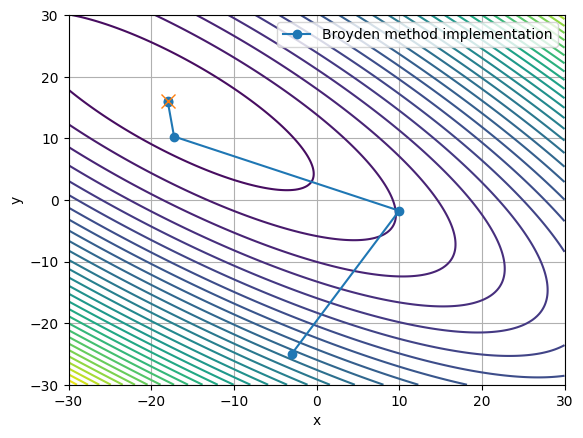

In [21]:
print_output([-3, -25], broyden_method_implementation, func_re, grad_re, [-18, 16],
             label="Broyden method implementation", grid=[-30, 30])

# 2. Rosenbrock function

Method: Broyden method implementation
Initial point: [-5, 3]
Real minimum: [1, 1]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (1.000, 1.000)       0.000         35            173        0.000001  


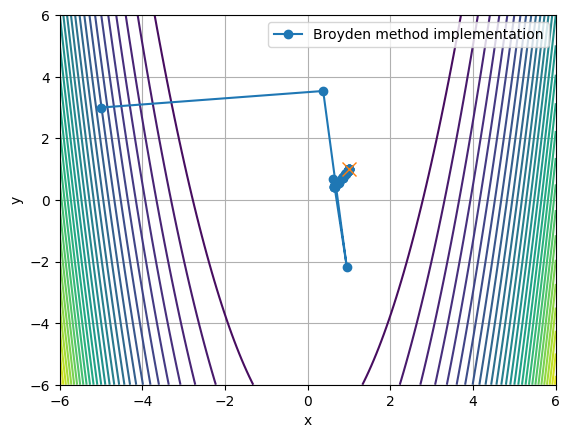

In [22]:
print_output([-5, 3], broyden_method_implementation, rosenbrock, grad_rosenbrock, [1, 1],
             label="Broyden method implementation")


# 3. Himmelblau function

Method: Broyden method implementation
Initial point: [-5, 3]
Known minima: [[3, 2], [-2.805118, 3.131312], [-3.77931, -3.283186], [3.584428, -1.848126]]
Closest minimum: [3, 2]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (2.232, 2.893)       22.753        4             50         1.178204  


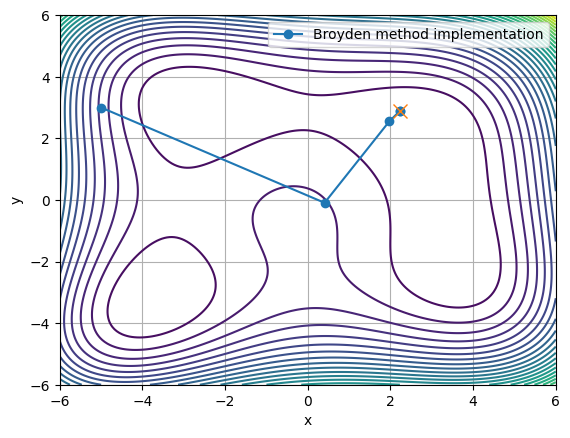

In [23]:
himmelblau_minima = [
    [3, 2],
    [-2.805118, 3.131312],
    [-3.779310, -3.283186],
    [3.584428, -1.848126]
]

print_output_multi_minima([-5, 3], broyden_method_implementation, himmelblau, grad_himmelblau,
                          himmelblau_minima, label="Broyden method implementation")

# 4. Bukin function N 6

Method: Broyden method implementation
Initial point: [4, 4]
Real minimum: [-10, 0]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-8.463, 0.556)       40.085        1000          22976      1.634617  


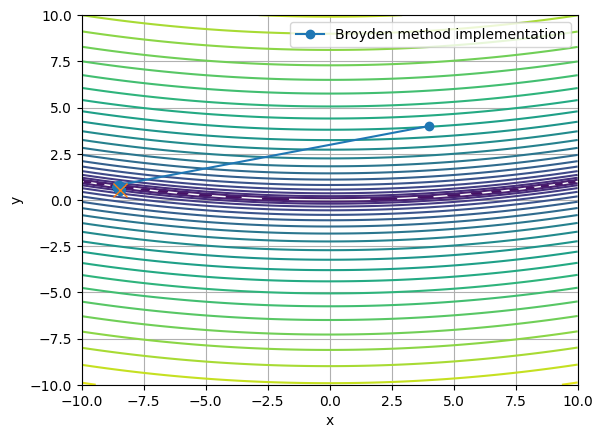

In [24]:
print_output([4, 4], broyden_method_implementation, bukin, grad_bukin, [-10, 0], label="Broyden method implementation",
             grid=[-10, 10])


# 5. Rastrigin function


Method: Broyden method implementation
Initial point: [4, 4]
Real minimum: [0, 0]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-0.000, -0.000)       0.000         3             8          0.000000  


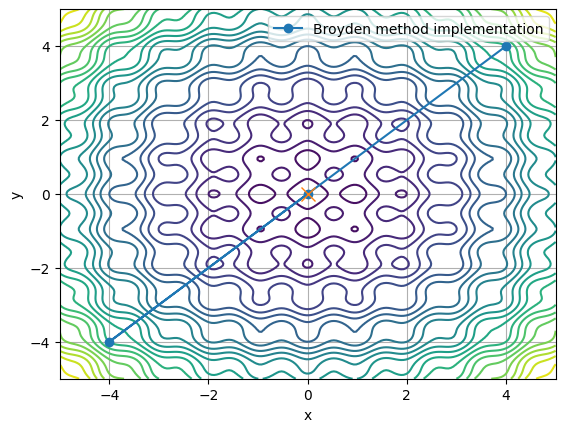

In [25]:
print_output([4, 4], broyden_method_implementation, rastrigin, grad_rastrigin, [0, 0],
             label="Broyden method implementation", grid=[-5, 5])